In [1]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [3]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

  



In [4]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [5]:
#printing the data
print(data)

                         inputs       tags
0                 hello techbot   greeting
1                    hi techbot   greeting
2                         hello   greeting
3                            hi   greeting
4                     hey there   greeting
5                           hey   greeting
6                      hi there   greeting
7          hi, nice to meet you   greeting
8          hi, nice to meet you   greeting
9                        hi bot   greeting
10                    hello bot   greeting
11                   hi chatbot   greeting
12                      hey bot   greeting
13                      hi dude   greeting
14                   hello dude   greeting
15                          bye    goodbye
16                     okay bye    goodbye
17                      goodbye    goodbye
18                see you later    goodbye
19       i will catch you later    goodbye
20        i will catch up later    goodbye
21    okay i will see you later    goodbye
22     I wi

In [6]:
#<stemming and other text preprocessing to be done here >

In [7]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hello techbot,greeting
1,hi techbot,greeting
2,hello,greeting
3,hi,greeting
4,hey there,greeting
5,hey,greeting
6,hi there,greeting
7,hi nice to meet you,greeting
8,hi nice to meet you,greeting
9,hi bot,greeting


In [8]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [9]:
input_shape = x_train.shape[1]

In [10]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)

number of unique words :  42


In [14]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(4,activation="softmax")(x)

model  = Model(i,x)

In [15]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 4ms/step - loss: 1.3879 - accuracy: 0.0500
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3862 - accuracy: 0.1000
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3852 - accuracy: 0.1500
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3840 - accuracy: 0.2500
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3827 - accuracy: 0.4000
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3816 - accuracy: 0.3750
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3802 - accuracy: 0.3750
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3790 - accuracy: 0.3750
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3778 - accuracy: 0.3750
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3764 - accuracy: 0.3750
Epoch 11/200
2/2 [===========

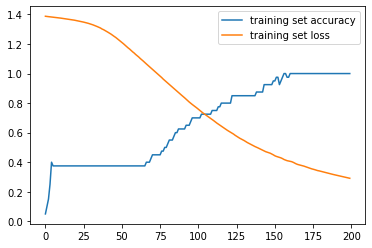

In [17]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [18]:
#predictions
import random
texts_p = []
prediction_input = input('Enter text: ')

#removing punctuation and converting to lowercase
prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
prediction_input = ''.join(prediction_input)
texts_p.append(prediction_input)

#tokenizing and padding
prediction_input = tokenizer.texts_to_sequences(texts_p)
prediction_input = np.array(prediction_input).reshape(-1)
prediction_input = pad_sequences([prediction_input],6)

#getting output from model
output = model.predict(prediction_input)
output = output.argmax()

#finding the right tag and predicting
response_tag = le.inverse_transform([output])[0]
print("Tag:",response_tag)
print(random.choice(responses[response_tag]))



Enter text: hello techbot
Tag: greeting
Hello my friend, How can I help you ?
